# **Analysis of Voter Abstention on Brazil's Presidential Elections through Data Clustering**

Dataset link:
https://drive.google.com/file/d/10mr3g08njJv1jVCTdFjNkNO5s51Iqvyv/view?usp=sharing


In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# I chose to upload the dataset to Google Drive and work with Colab
# If you wont be using Colab, delete this cell and adjust the path on the next one

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/My Drive/justificativa.csv', sep=';', encoding='utf-8')

In [4]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Don't break lines to fit the screen
pd.set_option('display.max_colwidth', None)  # Show full column contents

# **Exploratory Data Analysis (EDA)**

When working with any type of data, it is imperative to first perform what is called EDA - Exploratory Data Analysis

Here, our goal is to understand the values on the dataset and their distribution.
Using Pandas, I, personally, really like to use the _value_counts()_ funcion

In [5]:
# Since I already know there are encoding errors on this dataset, I'm correcting
# them to ease with visualization
df['Intérprete de libras'] = df['Intérprete de libras'].replace(['N�O INFORMADO', 'N�O'],
                                                                ['NAO INFORMADO', 'NAO'])

df['Quilombola'] = df['Quilombola'].replace(['N�O INFORMADO', 'N�O'],
                                            ['NAO INFORMADO', 'NAO'])
df['Obrigatoriedade do voto'] = df['Obrigatoriedade do voto'].replace('Obrigat�rio', 'Obrigatorio')

df['Grau de instrução'] = df['Grau de instrução'].replace(['L� E ESCREVE', 'ENSINO M�DIO COMPLETO',
                                                           'ENSINO M�DIO INCOMPLETO', 'N�O INFORMADO'],
                                                            ['LE E ESCREVE', 'ENSINO MEDIO COMPLETO',
                                                             'ENSINO MEDIO INCOMPLETO', 'NAO INFORMADO'])

df['Faixa etária'] = df['Faixa etária'].replace('Inv�lida', 'Invalida')
df['Estado civil'] = df['Estado civil'].replace(['N�O INFORMADO', 'VI�VO'],
                                                ['NAO INFORMADO', 'VIUVO'])

df['Gênero'] = df['Gênero'].replace('N�O INFORMADO', 'NAO INFORMADO')
df['Identidade de gênero'] = df['Identidade de gênero'].replace(['N�O INFORMADO', 'Cisg�nero',
                                                                 'Prefere n�o informar', 'Transg�nero'],
                                                                  ['NAO INFORMADO', 'Cisgenero',
                                                                   'Prefere nao informar', 'Transgenero'])

df['Raça / cor'] = df['Raça / cor'].replace('N�O INFORMADO', 'NAO INFORMADO')

In [6]:
df.head(5)

,Estado civil,Faixa etária,Identidade de gênero,Intérprete de libras,Município,Quilombola,Raça / cor,Região,UF,Ano de eleição,Gênero,País,Turno,Grau de instrução,Nome social,Obrigatoriedade do voto,Situação do eleitor,UF justificativa,Quantidade de justificativas,Data de carga
0,CASADO,100 anos ou mais,NAO INFORMADO,NAO INFORMADO,ALTO BOA VISTA,NAO INFORMADO,NAO INFORMADO,CENTRO-OESTE,MT,2024,MASCULINO,Brasil,1,ANALFABETO,N,Facultativo,Apto,NI,1,2025-04-28 15:49:14
1,CASADO,100 anos ou mais,NAO INFORMADO,NAO INFORMADO,ARACAJU,NAO INFORMADO,NAO INFORMADO,NORDESTE,SE,2024,FEMININO,Brasil,1,ENSINO FUNDAMENTAL INCOMPLETO,N,Facultativo,Inapto,NI,1,2025-04-28 15:49:14
2,CASADO,100 anos ou mais,NAO INFORMADO,NAO INFORMADO,ARA�ATUBA,NAO INFORMADO,NAO INFORMADO,SUDESTE,SP,2024,MASCULINO,Brasil,1,LE E ESCREVE,N,Facultativo,Inapto,NI,1,2025-04-28 15:49:14
3,CASADO,100 anos ou mais,NAO INFORMADO,NAO INFORMADO,BARBACENA,NAO INFORMADO,NAO INFORMADO,SUDESTE,MG,2024,MASCULINO,Brasil,1,LE E ESCREVE,N,Facultativo,Apto,NI,1,2025-04-28 15:49:14
4,CASADO,100 anos ou mais,NAO INFORMADO,NAO INFORMADO,BELO HORIZONTE,NAO INFORMADO,NAO INFORMADO,SUDESTE,MG,2024,FEMININO,Brasil,1,LE E ESCREVE,N,Facultativo,Inapto,NI,1,2025-04-28 15:49:14


In [7]:
df['Estado civil'].value_counts()

Estado civil
SOLTEIRO                  1438482
CASADO                     710195
DIVORCIADO                 180833
VIUVO                       59930
SEPARADO JUDICIALMENTE      46102
NAO INFORMADO                1030
Name: count, dtype: int64

In [8]:
df['Faixa etária'].value_counts()

Faixa etária
35 a 39 anos        291442
40 a 44 anos        283415
30 a 34 anos        274903
45 a 49 anos        250004
25 a 29 anos        234525
50 a 54 anos        217196
55 a 59 anos        202591
60 a 64 anos        181355
21 a 24 anos        147861
65 a 69 anos        142190
20 anos              52998
70 a 74 anos         48399
19 anos              47262
18 anos              32360
75 a 79 anos         15231
17 anos               5887
80 a 84 anos          4644
16 anos               2458
85 a 89 anos          1356
90 a 94 anos           333
95 a 99 anos            76
100 anos ou mais        47
Invalida                39
Name: count, dtype: int64

In [9]:
df['Identidade de gênero'].value_counts()

# Here, we can already see a very high amount of missing data
# This may indicate that it would be best to prune this attribute from our
# clusters

Identidade de gênero
NAO INFORMADO           2039501
Cisgenero                337898
Prefere nao informar      56921
Transgenero                2252
Name: count, dtype: int64

In [10]:
df['Intérprete de libras'].value_counts()

# Again, very high amount of missing data

Intérprete de libras
NAO INFORMADO    2039503
NAO               388522
SIM                 8547
Name: count, dtype: int64

In [11]:
print(len(df['Município'].unique()))

# Here, we see that there is an absurd amount of different cities on our data
# Hence, this attribute may be too specific for us to work with

5349


In [12]:
df['Quilombola'].value_counts()

# Again, lots of missing values

Quilombola
NAO INFORMADO    2039498
NAO               395009
SIM                 2065
Name: count, dtype: int64

In [13]:
df['Raça / cor'].value_counts()

Raça / cor
NAO INFORMADO    2039502
Parda             197844
Branca            145815
Preta              45522
Amarela             4996
Ind�gena            2893
Name: count, dtype: int64

In [14]:
df['Região'].value_counts()

Região
SUDESTE         854617
NORDESTE        804747
SUL             374889
NORTE           231033
CENTRO-OESTE    170338
EXTERIOR           948
Name: count, dtype: int64

In [15]:
df['UF'].value_counts()

# Seems well-distributed, following Brazil's most popular regions

UF
SP    407648
MG    294080
BA    218599
PR    145003
RS    134679
PE    124783
PA    111245
MA    107454
CE    105825
RJ    103855
SC     95207
GO     80281
PB     69532
MT     53868
PI     50207
ES     49034
RN     48719
AL     47598
AM     39348
MS     35818
SE     32030
RO     30873
TO     25144
AC     10185
AP      8350
RR      5888
ZZ       948
DF       371
Name: count, dtype: int64

In [16]:
df['Ano de eleição'].value_counts()

# Only one value, hence ends up being irrelevant

Ano de eleição
2024    2436572
Name: count, dtype: int64

In [17]:
df['Gênero'].value_counts()

Gênero
FEMININO         1233978
MASCULINO        1202000
NAO INFORMADO        594
Name: count, dtype: int64

In [18]:
df['País'].value_counts()

País
Brasil      2435624
Exterior        948
Name: count, dtype: int64

In [19]:
df['Turno'].value_counts()

Turno
1    2337894
2      98678
Name: count, dtype: int64

In [20]:
df['Grau de instrução'].value_counts()

Grau de instrução
ENSINO MEDIO COMPLETO            586780
ENSINO FUNDAMENTAL INCOMPLETO    515045
ENSINO MEDIO INCOMPLETO          402065
SUPERIOR COMPLETO                319044
ENSINO FUNDAMENTAL COMPLETO      202926
SUPERIOR INCOMPLETO              196630
LE E ESCREVE                     154291
ANALFABETO                        59266
NAO INFORMADO                       525
Name: count, dtype: int64

In [21]:
df['Nome social'].value_counts()

Nome social
N    2434183
S       2389
Name: count, dtype: int64

In [22]:
df['Obrigatoriedade do voto'].value_counts()

Obrigatoriedade do voto
Obrigatorio    2304428
Facultativo     132144
Name: count, dtype: int64

In [23]:
df['Situação do eleitor'].value_counts()

Situação do eleitor
Apto      2226547
Inapto     210025
Name: count, dtype: int64

In [24]:
df['UF justificativa'].value_counts()

UF justificativa
NI    774359
SP    341911
MG    195772
PR    114614
RJ    112327
SC     98679
BA     93681
RS     84050
GO     80214
PE     60802
PA     59290
CE     56350
MT     54238
ES     50206
MA     38595
PB     31263
MS     29189
AM     27196
RN     25056
AL     20676
RO     19955
PI     19197
SE     18069
TO     17589
AP      4794
AC      4264
RR      4236
Name: count, dtype: int64

In [25]:
df['Quantidade de justificativas'].value_counts()

# This attribute wont be relevant for our analysis. While the row clearly has
# measurement problems, we wish to cluster everyone which hasnt voted at least
# once. The exact amount is irrelevant

Quantidade de justificativas
1       1665116
2        321740
3        135028
4         73503
5         46573
6         32002
7         23251
8         17687
9         14055
10        11326
11         9180
12         7602
13         6547
14         5519
15         4749
16         4127
17         3677
18         3321
19         2906
20         2638
21         2374
22         2071
23         2006
24         1721
25         1612
26         1499
27         1312
28         1296
29         1189
30         1081
31         1018
32          976
33          911
34          818
37          770
36          768
35          765
39          649
38          605
41          583
40          555
43          553
42          510
44          503
45          471
46          455
47          442
49          408
48          382
53          372
51          370
52          360
54          350
50          347
55          311
56          306
58          297
57          291
60          271
59          263
61         

In [26]:
df['Data de carga'].value_counts()

Data de carga
2025-04-28 15:49:14    2436572
Name: count, dtype: int64

From the points estabilished from our EDA, we may drop the columns which we feel aren't going to be helpful for our analysis

In [27]:
df = df.drop(columns=['Data de carga', 'Município',
                      'Turno', 'Ano de eleição'])

In [28]:
df.head(5)

,Estado civil,Faixa etária,Identidade de gênero,Intérprete de libras,Quilombola,Raça / cor,Região,UF,Gênero,País,Grau de instrução,Nome social,Obrigatoriedade do voto,Situação do eleitor,UF justificativa,Quantidade de justificativas
0,CASADO,100 anos ou mais,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,CENTRO-OESTE,MT,MASCULINO,Brasil,ANALFABETO,N,Facultativo,Apto,NI,1
1,CASADO,100 anos ou mais,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NORDESTE,SE,FEMININO,Brasil,ENSINO FUNDAMENTAL INCOMPLETO,N,Facultativo,Inapto,NI,1
2,CASADO,100 anos ou mais,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,SUDESTE,SP,MASCULINO,Brasil,LE E ESCREVE,N,Facultativo,Inapto,NI,1
3,CASADO,100 anos ou mais,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,SUDESTE,MG,MASCULINO,Brasil,LE E ESCREVE,N,Facultativo,Apto,NI,1
4,CASADO,100 anos ou mais,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,SUDESTE,MG,FEMININO,Brasil,LE E ESCREVE,N,Facultativo,Inapto,NI,1


These columns will be dropped due to high amounts of missing data

In [29]:
df = df.drop(columns=['Raça / cor', 'Identidade de gênero',
                      'Intérprete de libras', 'Quilombola'])

In [30]:
df.head(5)

,Estado civil,Faixa etária,Região,UF,Gênero,País,Grau de instrução,Nome social,Obrigatoriedade do voto,Situação do eleitor,UF justificativa,Quantidade de justificativas
0,CASADO,100 anos ou mais,CENTRO-OESTE,MT,MASCULINO,Brasil,ANALFABETO,N,Facultativo,Apto,NI,1
1,CASADO,100 anos ou mais,NORDESTE,SE,FEMININO,Brasil,ENSINO FUNDAMENTAL INCOMPLETO,N,Facultativo,Inapto,NI,1
2,CASADO,100 anos ou mais,SUDESTE,SP,MASCULINO,Brasil,LE E ESCREVE,N,Facultativo,Inapto,NI,1
3,CASADO,100 anos ou mais,SUDESTE,MG,MASCULINO,Brasil,LE E ESCREVE,N,Facultativo,Apto,NI,1
4,CASADO,100 anos ou mais,SUDESTE,MG,FEMININO,Brasil,LE E ESCREVE,N,Facultativo,Inapto,NI,1


Here, we drop all values from the column "País" which are not brazilian

In [31]:
df = df[df['País'] != 'Exterior']

Voters who aren't fit for voting are also irrelevant on our analysis

In [32]:
df = df[df['Situação do eleitor'] != 'Inapto']

One of the reasons why people may not vote is due to living on a different state from their electorate. Hence, we create a new column which represents that possibility

In [33]:
df['UF!=UFjus'] = (df['UF'] != df['UF justificativa']).astype(int)

df = df.drop(columns = ['UF justificativa'])

We care for people who havent voted at least once, so the exact amount is irrelevant

In [34]:
df = df.drop(columns = ['Quantidade de justificativas'])

In [35]:
df.head(5)

,Estado civil,Faixa etária,Região,UF,Gênero,País,Grau de instrução,Nome social,Obrigatoriedade do voto,Situação do eleitor,UF!=UFjus
0,CASADO,100 anos ou mais,CENTRO-OESTE,MT,MASCULINO,Brasil,ANALFABETO,N,Facultativo,Apto,1
3,CASADO,100 anos ou mais,SUDESTE,MG,MASCULINO,Brasil,LE E ESCREVE,N,Facultativo,Apto,1
5,CASADO,100 anos ou mais,SUL,SC,MASCULINO,Brasil,ENSINO MEDIO COMPLETO,N,Facultativo,Apto,1
12,CASADO,100 anos ou mais,NORDESTE,MA,MASCULINO,Brasil,ANALFABETO,N,Facultativo,Apto,0
13,CASADO,100 anos ou mais,SUL,RS,FEMININO,Brasil,LE E ESCREVE,N,Facultativo,Apto,1


In [36]:
df['País'].value_counts()

# Since we dropped all who aren't brazilian, this column is now irrelevant

País
Brasil    2225702
Name: count, dtype: int64

In [37]:
df['Situação do eleitor'].value_counts()

# Since we dropped all who aren't fit for voting, this column is now irrelevant

Situação do eleitor
Apto    2225702
Name: count, dtype: int64

In [38]:
df = df.drop(columns = ['Situação do eleitor', 'País'])

In [39]:
df.head(5)

,Estado civil,Faixa etária,Região,UF,Gênero,Grau de instrução,Nome social,Obrigatoriedade do voto,UF!=UFjus
0,CASADO,100 anos ou mais,CENTRO-OESTE,MT,MASCULINO,ANALFABETO,N,Facultativo,1
3,CASADO,100 anos ou mais,SUDESTE,MG,MASCULINO,LE E ESCREVE,N,Facultativo,1
5,CASADO,100 anos ou mais,SUL,SC,MASCULINO,ENSINO MEDIO COMPLETO,N,Facultativo,1
12,CASADO,100 anos ou mais,NORDESTE,MA,MASCULINO,ANALFABETO,N,Facultativo,0
13,CASADO,100 anos ou mais,SUL,RS,FEMININO,LE E ESCREVE,N,Facultativo,1


# **Data pre-processing**

Now, we must perform the necessary pre-processing steps on our data

The basics are:

*   Map binary values to numeric format.
*   Handle unknown or missing values.
*   Ordinal encoding of ordered categories.
*   One-hot encoding of nominal categorical variables.
*   Standard scaling of numeric features.

In [40]:
# Treating binary/ternary variables
df['Nome social'] = df['Nome social'].map({'S': 1, 'N': 0})
df['Obrigatoriedade do voto'] = df['Obrigatoriedade do voto'].map({
    'Obrigatorio': 1, 'Facultativo': 0
})

In [41]:
df.head(5)

,Estado civil,Faixa etária,Região,UF,Gênero,Grau de instrução,Nome social,Obrigatoriedade do voto,UF!=UFjus
0,CASADO,100 anos ou mais,CENTRO-OESTE,MT,MASCULINO,ANALFABETO,0,0,1
3,CASADO,100 anos ou mais,SUDESTE,MG,MASCULINO,LE E ESCREVE,0,0,1
5,CASADO,100 anos ou mais,SUL,SC,MASCULINO,ENSINO MEDIO COMPLETO,0,0,1
12,CASADO,100 anos ou mais,NORDESTE,MA,MASCULINO,ANALFABETO,0,0,0
13,CASADO,100 anos ou mais,SUL,RS,FEMININO,LE E ESCREVE,0,0,1


In [42]:
# Age and Education are ordinal, so they must be treated differently
ordinal_cols = ['Faixa etária', 'Grau de instrução']

faixa_etaria_order = [
    '16 anos', '17 anos', '18 anos', '19 anos', '20 anos',
    '21 a 24 anos', '25 a 29 anos', '30 a 34 anos', '35 a 39 anos',
    '40 a 44 anos', '45 a 49 anos', '50 a 54 anos', '55 a 59 anos',
    '60 a 64 anos', '65 a 69 anos', '70 a 74 anos', '75 a 79 anos',
    '80 a 84 anos', '85 a 89 anos', '90 a 94 anos', '95 a 99 anos',
    '100 anos ou mais', 'Invalida'
]

instrucao_order = ['NAO INFORMADO',
                   'ANALFABETO', 'LE E ESCREVE',
                   'ENSINO FUNDAMENTAL INCOMPLETO', 'ENSINO FUNDAMENTAL COMPLETO',
                   'ENSINO MEDIO INCOMPLETO', 'ENSINO MEDIO COMPLETO',
                   'SUPERIOR INCOMPLETO', 'SUPERIOR COMPLETO']

ord_encoder = OrdinalEncoder(categories=[faixa_etaria_order, instrucao_order])

In [43]:
# These columns have multiple values which must me treated, we must apply
# one-hot encoding
onehot_cols = ['Estado civil', 'Região', 'Gênero', 'UF']

onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [44]:
# Applies all of the pre-processing steps that were set up
# Impossible to use Gower distance with sklearn
preprocessor = ColumnTransformer(transformers=[
    ('ord', ord_encoder, ordinal_cols),
    ('onehot', onehot_encoder, onehot_cols),
], remainder='passthrough')

# **Data clustering**

Now, the fun part. We get to see all of our pipeline applied as we cluster the data

First, to see how many clusters would be ideal for our problem, we apply the Elbow Method

=== Elbow Method ===
k=1, Inertia=36914020.22
k=2, Inertia=21256480.13
k=3, Inertia=17267380.15
k=4, Inertia=14754857.96
k=5, Inertia=13653712.34
k=6, Inertia=11510130.30
k=7, Inertia=10872233.92
k=8, Inertia=10370625.36
k=9, Inertia=9909160.38
k=10, Inertia=9523124.84


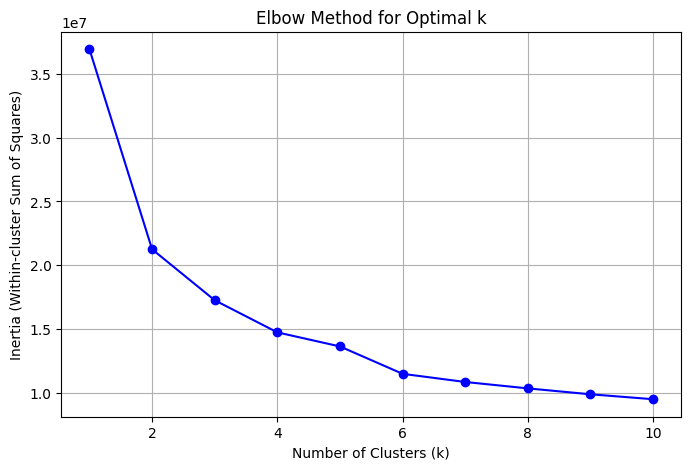

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X_processed = preprocessor.fit_transform(df)

# Elbow Method setup
inertias = []
k_values = range(1, 11)

print("=== Elbow Method ===")
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_processed)
    inertias.append(kmeans.inertia_)
    print(f"k={k}, Inertia={kmeans.inertia_:.2f}")

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

Here, we see that the sharpest drops in inertia happens between k = 1 and k = 3. After k = 4, the reduction in inertia starts to level off.

k = 4 seems to be the point where the “elbow” forms, as the improvement in inertia decreases after this point.

While having more than 4 clusters still improves the inertia, there are clear diminishing returns, which suggests that additional clusters offer smaller improvements.

In [46]:
k_chosen = 4


To evaluate our clusters, one metric we may use is the silhouette score

In general, the guide for Silhouette Score interpretation would be:

| Silhouette Score Range | Interpretation                      |
| ---------------------- | ----------------------------------- |
| 0.71 – 1.00            | Strong structure                    |
| 0.51 – 0.70            | Reasonable structure                |
| 0.26 – 0.50            | Weak structure, could be artificial |
| **0.00 – 0.25**        | **No substantial structure**        |

It is important to note that calculating a silhouette score scales on the factor of O(n²). Hence, I opt for a "MiniBatch" approach.

We choose a representative size of the dataset randomly, so that the calculations are feasible.

In [47]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

for i in range(3, 7):
  print(f"\n=== Silhouette Score for k={i} using MiniBatchKMeans ===")

  # MiniBatchKMeans clustering
  mini_kmeans = MiniBatchKMeans(n_clusters=i, random_state=42, batch_size=1024)
  labels = mini_kmeans.fit_predict(X_processed)

  # Use subsample for silhouette score if dataset is large
  sample_size = 10000
  if len(X_processed) > sample_size:
      rng = np.random.RandomState(42)
      idx = rng.choice(len(X_processed), sample_size, replace=False)
      score = silhouette_score(X_processed[idx], labels[idx])
  else:
      score = silhouette_score(X_processed, labels)

  print(f"Silhouette Score (MiniBatch, k={i}): {score:.4f}")


=== Silhouette Score for k=3 using MiniBatchKMeans ===
Silhouette Score (MiniBatch, k=3): 0.2315

=== Silhouette Score for k=4 using MiniBatchKMeans ===
Silhouette Score (MiniBatch, k=4): 0.2362

=== Silhouette Score for k=5 using MiniBatchKMeans ===
Silhouette Score (MiniBatch, k=5): 0.2330

=== Silhouette Score for k=6 using MiniBatchKMeans ===
Silhouette Score (MiniBatch, k=6): 0.2116


As you may see from the scores, k=4 really would be the optimal amount of clusters. Still, a score of ~0.2 isn't great.

The reality is, we're using KMeans on an Euclidean distance, but a few of our attributes are binary. This is a myopic approach, and ignores the reality of the data

## **Possible workarounds**

There are a few ways we could work around this. Mainly, we could:

1.   Use Gower distance + KMedoids
2.   Use K-Prototypes

The problem we must keep in mind is that, as you will see, we have more than 2 million rows. So, while Gower + KMedoids would be a possible solution, it will suffers with scalability.

Hence, I chose to work with K-Prototypes.

In [48]:
row_count = df.shape[0]
print(f"Number of rows: {row_count}")

Number of rows: 2225702


## **About K-Prototypes**
K-Prototypes is designed for our exact scenario: mixes between numerical and categorical data.

It applies Euclidean distance for numeric features and matching for categorical, scaling better than Gower-based methods.

In [49]:
df.head(5)

,Estado civil,Faixa etária,Região,UF,Gênero,Grau de instrução,Nome social,Obrigatoriedade do voto,UF!=UFjus
0,CASADO,100 anos ou mais,CENTRO-OESTE,MT,MASCULINO,ANALFABETO,0,0,1
3,CASADO,100 anos ou mais,SUDESTE,MG,MASCULINO,LE E ESCREVE,0,0,1
5,CASADO,100 anos ou mais,SUL,SC,MASCULINO,ENSINO MEDIO COMPLETO,0,0,1
12,CASADO,100 anos ou mais,NORDESTE,MA,MASCULINO,ANALFABETO,0,0,0
13,CASADO,100 anos ou mais,SUL,RS,FEMININO,LE E ESCREVE,0,0,1


As next steps, we must:

1.   Install kmodes (to get K-Prototypes)
2.   Manually treat categorical data
3.   Run this new cluster algorithm

Before we move on to code, it is important to understand that K-Prototypes treats categorical variables as purely nominal — it does not recognize order among categories. This is why step 2 is essential.

Faixa etária and Grau de instrução are both ordinal, but K-Prototypes sees them only as labels with no rank.

Now, we should map these features before passing them into K-Prototypes.

In [50]:
df['Grau de instrução'].unique()

array(['ANALFABETO', 'LE E ESCREVE', 'ENSINO MEDIO COMPLETO',
       'ENSINO FUNDAMENTAL INCOMPLETO', 'ENSINO MEDIO INCOMPLETO',
       'ENSINO FUNDAMENTAL COMPLETO', 'SUPERIOR INCOMPLETO',
       'SUPERIOR COMPLETO', 'NAO INFORMADO'], dtype=object)

In [51]:
# Map ordinals to integers
grau_de_instrucao_mapping = {
    'NAO INFORMADO': 8, # "uninformed" is a special unknown
    'ANALFABETO': 0,
    'LE E ESCREVE': 1,
    'ENSINO FUNDAMENTAL INCOMPLETO': 2,
    'ENSINO FUNDAMENTAL COMPLETO': 3,
    'ENSINO MEDIO INCOMPLETO': 4,
    'ENSINO MEDIO COMPLETO': 5,
    'SUPERIOR INCOMPLETO': 6,
    'SUPERIOR COMPLETO': 7
}

df['Grau de instrução'] = df['Grau de instrução'].map(grau_de_instrucao_mapping)


In [52]:
df['Faixa etária'].unique()

array(['100 anos ou mais', '16 anos', '17 anos', '18 anos', '19 anos',
       '20 anos', '21 a 24 anos', '25 a 29 anos', '30 a 34 anos',
       '35 a 39 anos', '40 a 44 anos', '45 a 49 anos', '50 a 54 anos',
       '55 a 59 anos', '60 a 64 anos', '65 a 69 anos', '70 a 74 anos',
       '75 a 79 anos', '80 a 84 anos', '85 a 89 anos', '90 a 94 anos',
       '95 a 99 anos', 'Invalida'], dtype=object)

In [53]:
faixa_etaria_mapping = {
    'Invalida': 22,
    '16 anos': 0,
    '17 anos': 1,
    '18 anos': 2,
    '19 anos': 3,
    '20 anos': 4,
    '21 a 24 anos': 5,
    '25 a 29 anos': 6,
    '30 a 34 anos': 7,
    '35 a 39 anos': 8,
    '40 a 44 anos': 9,
    '45 a 49 anos': 10,
    '50 a 54 anos': 11,
    '55 a 59 anos': 12,
    '60 a 64 anos': 13,
    '65 a 69 anos': 14,
    '70 a 74 anos': 15,
    '75 a 79 anos': 16,
    '80 a 84 anos': 17,
    '85 a 89 anos': 18,
    '90 a 94 anos': 19,
    '95 a 99 anos': 20,
    '100 anos ou mais': 21
}

df['Faixa etária'] = df['Faixa etária'].map(faixa_etaria_mapping)


In [ ]:
!pip install kmodes

Of course, since we ran the Elbow Method with K-Means, we will now need to re-run it with K-Prototypes.

Fitting KPrototypes on sample for k=2
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 1
Fitting KPrototypes on sample for k=3
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 6
Fitting KPrototypes on sample for k=4
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 2
Fitting KPrototypes on sample for k=5
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 8
Fitting KPrototypes on sample for k=6
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 2
Fitting KPrototypes on sample for k=7
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 10
Fitting KPrototypes on sample for k=8
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 2
Fitting KPrototypes on sample for k=9
Initializ

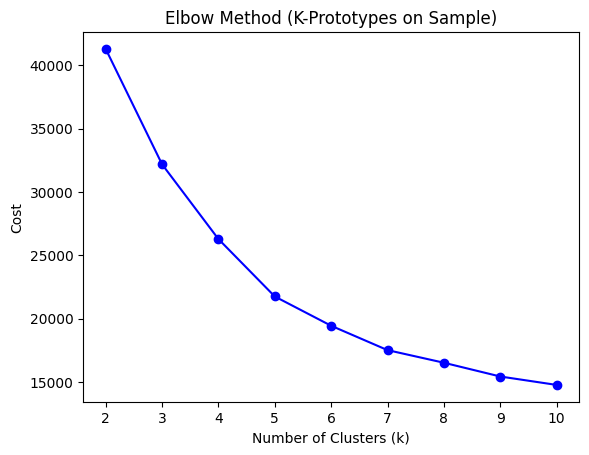

In [55]:
import numpy as np
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

sample_size = 5000
X_sample = df.sample(n=sample_size, random_state=42).copy()

categorical_columns = ['Estado civil', 'Região', 'UF', 'Gênero']
categorical_indices = [X_sample.columns.get_loc(col) for col in categorical_columns]
X_matrix = X_sample.to_numpy()

# Takes around 50min to run for 50000 samples
# Exhibited the same behavior on 5k, 10k, 50k and 100k samples

costs = []
K = range(2, 11)

for k in K:
    print(f"Fitting KPrototypes on sample for k={k}")
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=1, random_state=42, n_jobs=-1)
    kproto.fit_predict(X_matrix, categorical=categorical_indices)
    costs.append(kproto.cost_)

plt.plot(K, costs, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method (K-Prototypes on Sample)')
plt.show()

After running the Elbow Method for 50k samples, this was the result. It seems now from k=2 to k=5, there is a steep drop in cost. Then, from k=6 onward, the decrease is much lower.

Hence, we will now work with k=5 clusters


In [56]:
k_chosen = 5

In [57]:
from kmodes.kprototypes import KPrototypes

X = df.copy()

categorical_columns = ['Estado civil', 'Região', 'UF', 'Gênero']
categorical_indices = [X.columns.get_loc(col) for col in categorical_columns]

X_matrix = X.to_numpy()

kproto = KPrototypes(n_clusters=k_chosen, init='Cao', verbose=1, random_state=42)
clusters = kproto.fit_predict(X_matrix, categorical=categorical_indices)

# Assign clusters back to dataframe
X['Cluster'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 423504, ncost: 9878948.448359951
Run: 1, iteration: 2/100, moves: 186759, ncost: 9608297.935574653
Run: 1, iteration: 3/100, moves: 38009, ncost: 9588868.397267515
Run: 1, iteration: 4/100, moves: 12779, ncost: 9586149.23459978
Run: 1, iteration: 5/100, moves: 2575, ncost: 9586036.36125444
Run: 1, iteration: 6/100, moves: 0, ncost: 9586036.36125444
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 279403, ncost: 10775161.573960306
Run: 2, iteration: 2/100, moves: 135800, ncost: 10608172.904193595
Run: 2, iteration: 3/100, moves: 162929, ncost: 10193130.63202222
Run: 2, iteration: 4/100, moves: 198374, ncost: 9830291.158142047
Run: 2, iteration: 5/100, moves: 156609, ncost: 9606941.19427546
Run: 2, iteration: 6/100, moves: 82056, ncost: 95

In [58]:
X.to_csv('df_clusterized.csv', index=True)

## **Cluster Analysis**

The unfortunate thing is, we now cannot use the Silhouette Scores anymore. Silhouette Score relies on Euclidean distance, which, as we have seen doesn't handle categorical or binary variables well.

One thing we can (and will) do now is to use the _.cost__ attribute from the KPrototypes model in the kmodes library.

This is a direct output of the total dissimilarity between all points and their cluster centroids, based on the distance function used by K-Prototypes.

In [59]:
print(f"Total clustering cost: {kproto.cost_}")
# Doesnt mean much out of context

Total clustering cost: 9540677.325477628


In [60]:
avg_cost_per_point = kproto.cost_ / len(X)
print(f"Avg. cost per point: {avg_cost_per_point:.4f}")

Avg. cost per point: 4.2866


Now, we can also analyse the distribution of different attributes per cluster

To get a better understanding, we can reverse the mapping:

In [61]:
X['Faixa etária'].value_counts()

Faixa etária
8     257089
9     250073
7     245162
10    221812
6     217954
11    194641
12    184014
13    167640
5     146898
14    133199
4      52981
3      47239
15     45845
2      32357
16     14446
1       5886
17      4367
0       2456
18      1243
19       298
20        48
22        31
21        23
Name: count, dtype: int64

In [62]:
reverse_faixa_etaria_mapping = {v: k for k, v in faixa_etaria_mapping.items()}
X['Faixa etária'] = X['Faixa etária'].replace(reverse_faixa_etaria_mapping)

In [63]:
X['Faixa etária'].value_counts()

Faixa etária
35 a 39 anos        257089
40 a 44 anos        250073
30 a 34 anos        245162
45 a 49 anos        221812
25 a 29 anos        217954
50 a 54 anos        194641
55 a 59 anos        184014
60 a 64 anos        167640
21 a 24 anos        146898
65 a 69 anos        133199
20 anos              52981
19 anos              47239
70 a 74 anos         45845
18 anos              32357
75 a 79 anos         14446
17 anos               5886
80 a 84 anos          4367
16 anos               2456
85 a 89 anos          1243
90 a 94 anos           298
95 a 99 anos            48
Invalida                31
100 anos ou mais        23
Name: count, dtype: int64

Do the same for Education:

In [64]:
X['Grau de instrução'].value_counts()

Grau de instrução
5    557784
2    441184
4    356657
7    313924
6    190903
3    184954
1    127945
0     51949
8       402
Name: count, dtype: int64

In [65]:
reverse_grau_instrucao_mapping = {v: k for k, v in grau_de_instrucao_mapping.items()}
X['Grau de instrução'] = X['Grau de instrução'].replace(reverse_grau_instrucao_mapping)

In [66]:
X['Grau de instrução'].value_counts()

Grau de instrução
ENSINO MEDIO COMPLETO            557784
ENSINO FUNDAMENTAL INCOMPLETO    441184
ENSINO MEDIO INCOMPLETO          356657
SUPERIOR COMPLETO                313924
SUPERIOR INCOMPLETO              190903
ENSINO FUNDAMENTAL COMPLETO      184954
LE E ESCREVE                     127945
ANALFABETO                        51949
NAO INFORMADO                       402
Name: count, dtype: int64

Lets see the distribution of each attribute along the clusters:

In [67]:
col = 'Estado civil'
print(f"\n=== '{col}' PER CLUSTER ===")
print(X.groupby('Cluster')[col].value_counts(normalize=True).rename("Proportion").mul(100).round(1))


=== 'Estado civil' PER CLUSTER ===
Cluster  Estado civil          
0        CASADO                    42.2
         SOLTEIRO                  34.7
         DIVORCIADO                11.2
         VIUVO                      7.9
         SEPARADO JUDICIALMENTE     3.8
         NAO INFORMADO              0.1
1        CASADO                    43.7
         SOLTEIRO                  28.5
         DIVORCIADO                17.1
         VIUVO                      5.8
         SEPARADO JUDICIALMENTE     4.8
         NAO INFORMADO              0.1
2        SOLTEIRO                  90.0
         CASADO                     8.8
         DIVORCIADO                 0.8
         SEPARADO JUDICIALMENTE     0.2
         VIUVO                      0.1
3        SOLTEIRO                  53.0
         CASADO                    35.8
         DIVORCIADO                 9.1
         SEPARADO JUDICIALMENTE     1.3
         VIUVO                      0.8
         NAO INFORMADO              0.0
4        SOL

In [68]:
col = 'Região'
print(f"\n=== '{col}' PER CLUSTER ===")
print(X.groupby('Cluster')[col].value_counts(normalize=True).rename("Proportion").mul(100).round(1))


=== 'Região' PER CLUSTER ===
Cluster  Região      
0        SUDESTE         38.0
         NORDESTE        30.8
         SUL             15.1
         NORTE            9.1
         CENTRO-OESTE     7.0
1        SUDESTE         43.2
         NORDESTE        22.9
         SUL             18.4
         NORTE            8.3
         CENTRO-OESTE     7.2
2        NORDESTE        36.1
         SUDESTE         30.7
         SUL             14.6
         NORTE           11.4
         CENTRO-OESTE     7.1
3        SUDESTE         36.5
         NORDESTE        28.5
         SUL             17.4
         NORTE            9.5
         CENTRO-OESTE     8.1
4        NORDESTE        40.6
         SUDESTE         30.6
         SUL             13.0
         NORTE            9.5
         CENTRO-OESTE     6.3
Name: Proportion, dtype: float64


In [69]:
col = 'Gênero'
print(f"\n=== '{col}' PER CLUSTER ===")
print(X.groupby('Cluster')[col].value_counts(normalize=True).rename("Proportion").mul(100).round(1))


=== 'Gênero' PER CLUSTER ===
Cluster  Gênero       
0        FEMININO         52.4
         MASCULINO        47.5
         NAO INFORMADO     0.1
1        FEMININO         54.2
         MASCULINO        45.8
         NAO INFORMADO     0.0
2        FEMININO         51.8
         MASCULINO        48.2
3        FEMININO         54.3
         MASCULINO        45.7
4        MASCULINO        57.6
         FEMININO         42.4
         NAO INFORMADO     0.0
Name: Proportion, dtype: float64


In [70]:
col = 'Grau de instrução'
print(f"\n=== '{col}' per CLUSTER ===")
print(X.groupby('Cluster')[col].value_counts(normalize=True).rename("Proportion").mul(100).round(1))


=== 'Grau de instrução' per CLUSTER ===
Cluster  Grau de instrução            
0        ENSINO FUNDAMENTAL INCOMPLETO    49.8
         LE E ESCREVE                     22.2
         ENSINO FUNDAMENTAL COMPLETO      18.8
         ANALFABETO                        9.2
         ENSINO MEDIO INCOMPLETO           0.0
1        ENSINO MEDIO COMPLETO            42.3
         SUPERIOR COMPLETO                31.7
         ENSINO MEDIO INCOMPLETO          15.2
         SUPERIOR INCOMPLETO              10.6
         NAO INFORMADO                     0.1
2        ENSINO MEDIO INCOMPLETO          40.4
         ENSINO MEDIO COMPLETO            28.3
         ENSINO FUNDAMENTAL INCOMPLETO    13.0
         SUPERIOR INCOMPLETO              11.2
         ENSINO FUNDAMENTAL COMPLETO       6.1
         SUPERIOR COMPLETO                 0.6
         LE E ESCREVE                      0.3
         ANALFABETO                        0.1
3        ENSINO MEDIO COMPLETO            45.6
         SUPERIOR COMPLETO 

In [73]:
col = 'Faixa etária'
print(f"\n=== '{col}' per CLUSTER ===")
print(X.groupby('Cluster')[col].value_counts(normalize=True).rename("Proportion").mul(100).round(1))


=== 'Faixa etária' per CLUSTER ===
Cluster  Faixa etária    
0        55 a 59 anos        24.6
         50 a 54 anos        23.2
         60 a 64 anos        23.1
         65 a 69 anos        18.9
         70 a 74 anos         6.9
         75 a 79 anos         2.2
         80 a 84 anos         0.7
         85 a 89 anos         0.2
         90 a 94 anos         0.1
         95 a 99 anos         0.0
         Invalida             0.0
         100 anos ou mais     0.0
1        50 a 54 anos        28.5
         55 a 59 anos        25.0
         60 a 64 anos        22.0
         65 a 69 anos        16.9
         70 a 74 anos         5.4
         75 a 79 anos         1.7
         80 a 84 anos         0.4
         85 a 89 anos         0.1
         90 a 94 anos         0.0
         95 a 99 anos         0.0
         Invalida             0.0
         100 anos ou mais     0.0
2        25 a 29 anos        37.0
         21 a 24 anos        28.1
         20 anos             10.1
         19 anos    

## **Association Rules**

With our clusters defined, one thing we can do is to extract "association rules" from each cluster. This will be done in the following cells

In [74]:
from mlxtend.preprocessing import TransactionEncoder

# Convert rows into list of strings like 'gender=Male', 'age=60-69'
transactions = []
for _, row in X.iterrows():
    row_items = []
    row_items.append(f"gender={row['Gênero']}")
    row_items.append(f"age_group={row['Faixa etária']}")
    row_items.append(f"schooling={row['Grau de instrução']}")
    row_items.append(f"cluster={row['Cluster']}")

    transactions.append(row_items)

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


In [75]:
from mlxtend.frequent_patterns import apriori, association_rules

# Find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Extract rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)

In [76]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(age_group=18 anos),(cluster=2),0.014538,0.235048,0.014538,1.000000,4.254449,1.0,0.011121,inf,0.776237,0.061851,1.000000,0.530925
1,(age_group=19 anos),(cluster=2),0.021224,0.235048,0.021224,1.000000,4.254449,1.0,0.016236,inf,0.781540,0.090298,1.000000,0.545149
2,(age_group=20 anos),(cluster=2),0.023804,0.235048,0.023804,1.000000,4.254449,1.0,0.018209,inf,0.783605,0.101274,1.000000,0.550637
3,(age_group=21 a 24 anos),(cluster=2),0.066001,0.235048,0.066001,1.000000,4.254449,1.0,0.050487,inf,0.819007,0.280797,1.000000,0.640398
4,(age_group=25 a 29 anos),(cluster=2),0.097926,0.235048,0.086863,0.887031,3.773829,1.0,0.063846,6.771356,0.814808,0.352944,0.852319,0.628293
5,(age_group=35 a 39 anos),(cluster=3),0.115509,0.254386,0.072124,0.624399,2.454529,1.0,0.042740,1.985119,0.669979,0.242212,0.496252,0.453960
6,(schooling=ANALFABETO),(cluster=0),0.023341,0.172217,0.015779,0.676028,3.925442,1.0,0.011759,2.555109,0.763062,0.087768,0.608627,0.383825
7,(schooling=LE E ESCREVE),(cluster=0),0.057485,0.172217,0.038261,0.665583,3.864789,1.0,0.028361,2.475300,0.786464,0.199859,0.596009,0.443876
8,(schooling=SUPERIOR COMPLETO),(cluster=3),0.141045,0.254386,0.088463,0.627196,2.465528,1.0,0.052583,2.000018,0.692012,0.288182,0.500004,0.487473
9,"(gender=FEMININO, age_group=19 anos)",(cluster=2),0.011118,0.235048,0.011118,1.000000,4.254449,1.0,0.008505,inf,0.773552,0.047302,1.000000,0.523651
